In [5]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [6]:
multi_dataDIR = '/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Ubottomdegrad.nc'
AZE=xr.open_mfdataset(multi_dataDIR,concat_dim='t', combine='nested')
AZE

<xarray.Dataset>
Dimensions:            (t: 12, y: 1181, x: 1480)
Dimensions without coordinates: t, y, x
Data variables:
    degraded_vozocrtx  (t, y, x) float32 dask.array<chunksize=(1, 1181, 1480), meta=np.ndarray>

In [7]:
umean = AZE.degraded_vozocrtx.mean(dim='t')

In [8]:
umean.shape

(1181, 1480)

In [9]:
umean.size

1747880

In [10]:
dirf='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Ubottomdegrad.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1181, x: 1480, depthu: 1)
Coordinates:
  * depthu             (depthu) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vozocrtx  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:01 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [11]:
navlon = ds.nav_lon
navlat = ds.nav_lat

In [12]:
vit1 = AZE.degraded_vozocrtx.mean(dim='t')
lon = navlon
lat = navlat

In [13]:
vit_mask=ma.masked_where(vit1==0.,vit1)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_43922/4114246552.py:22: Matp

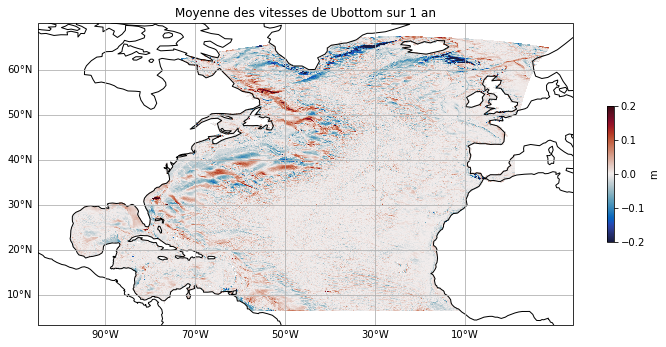

In [14]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,vit_mask,transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,vmin=-0.2,vmax=0.2)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne des vitesses de Ubottom sur 1 an')
plt.savefig('Moy_v_Ubottom_annee.png', bbbox_inches='tight')
